# COG multi-band example

In [1]:
import rioxarray

In [2]:
# from https://openaerialmap.org/
cog_url = (
    "https://oin-hotosm.s3.amazonaws.com/5d7dad0becaf880008a9bc88/0/5d7dad0becaf880008a9bc89.tif"
)

## Open a pre-computed lower resolution overview
- overview_level=4 is an argument specific to the rasterio engine that allows opening a pre-computed lower resolution “overview” of the data

In [3]:
dset = rioxarray.open_rasterio(cog_url, masked=True, overview_level=4)

In [4]:
dset

<xarray.DataArray (band: 3, y: 312, x: 688)>
[643968 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Attributes:
    acquisitionEndDate:    2019-09-14T17:10:25+00:00
    acquisitionStartDate:  2019-09-14T16:40:25+00:00
    AREA_OR_POINT:         Area
    isCalibrated:          False
    scale_factor:          1.0
    add_offset:            0.0

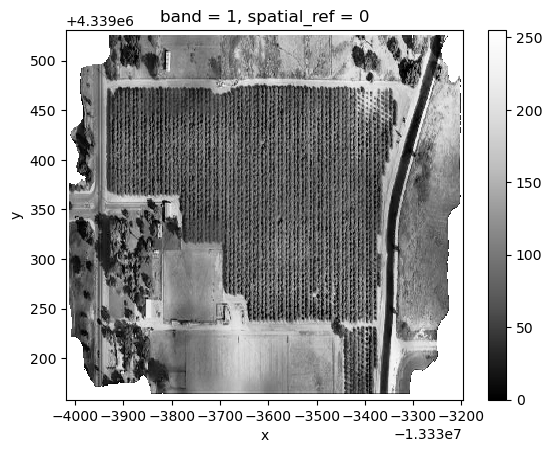

In [5]:
dset.sel(band=1).plot(cmap="Greys_r")

## Visualize as RGB image

/srv/conda/envs/notebook/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:203: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/xarray/plot/utils.py:245: RuntimeWarning: overflow encountered in scalar absolute
  vlim = max(abs(vmin - center), abs(vmax - center))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


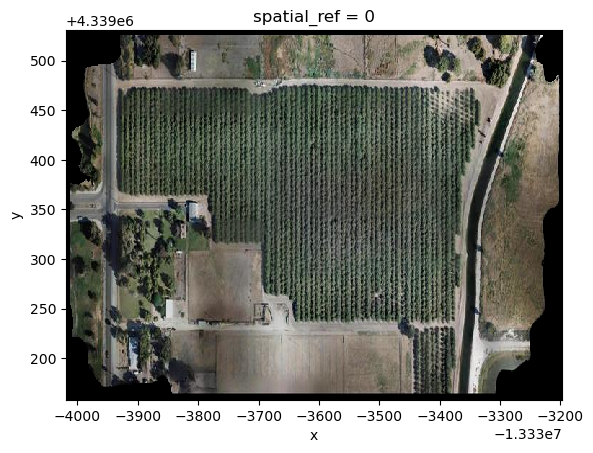

In [6]:
dset.astype("int").plot.imshow(rgb="band")

## Open with Xarray
- We need to open and read a data array
- we can pass an argument to open a pre-computed lower resolution overview

In [7]:
import xarray as xr

In [8]:
dset = xr.open_dataarray(cog_url, engine='rasterio', open_kwargs={"overview_level": 2})
dset

<xarray.DataArray 'band_data' (band: 3, y: 1248, x: 2752)>
[10303488 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 ...
Attributes:
    acquisitionEndDate:    2019-09-14T17:10:25+00:00
    acquisitionStartDate:  2019-09-14T16:40:25+00:00
    AREA_OR_POINT:         Area
    isCalibrated:          False

/srv/conda/envs/notebook/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:203: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/xarray/plot/utils.py:245: RuntimeWarning: overflow encountered in scalar absolute
  vlim = max(abs(vmin - center), abs(vmax - center))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


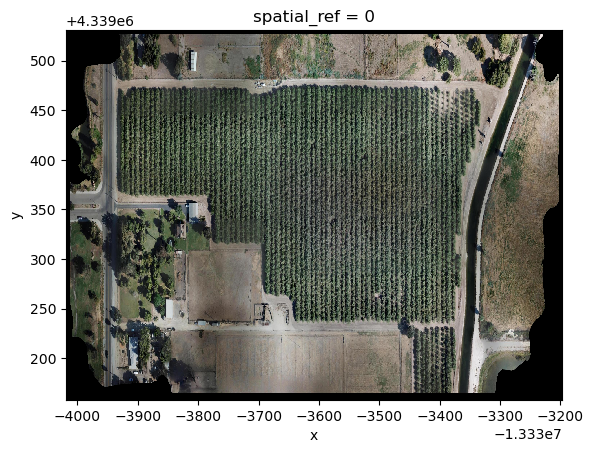

In [9]:
dset.astype("int").plot.imshow(rgb="band")